<a href="https://colab.research.google.com/github/gaesu96/gaesu_public/blob/main/mask_rcnn_inference_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 3.7 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 38019, done.
remote: Total 38019 (delta 0), reused 0 (delta 0), pack-reused 38019
Receiving objects: 100% (38019/38019), 63.18 MiB | 18.45 MiB/s, done.
Resolving deltas: 100% (26232/26232), done.
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/arti

In [4]:
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 500.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.17.1+cu121
    Uninstalling torchvision-0.17.1+cu121:
      Successfully uninstalled torchvision-0.17.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.7.1 requires torch>=2, but you have torch 1.13.0+cu116 which is incompatible.
torchtext 0.17.1 requires torc

In [1]:
import torch

In [2]:
from mmdet.apis import init_detector, inference_detector
import mmcv

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [3]:
!cd mmdetection; mkdir checkpoints

In [4]:
!wget -O /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth

--2024-05-11 16:22:38--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.23.234, 47.246.23.235, 47.246.23.236, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.23.234|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254089599 (242M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’

/content/mmdetectio 100%[===================>] 242.32M  6.10MB/s    in 41s     

2024-05-11 16:23:20 (5.92 MB/s) - ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’ saved [254089599/254089599]



In [5]:
config_file = '/content/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

In [6]:
from mmdet.apis import init_detector, inference_detector

model = init_detector(config_file, checkpoint_file, device='cpu')

load checkpoint from local path: /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


In [7]:

img_path = '/content/mmdetection/demo/demo.jpg'
# inference_detector의 인자로 string(file경로), ndarray가 단일 또는 list형태로 입력 될 수 있음.
results = inference_detector(model, img_path)

/usr/local/lib/python3.10/dist-packages/mmdet-2.28.2-py3.10.egg/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


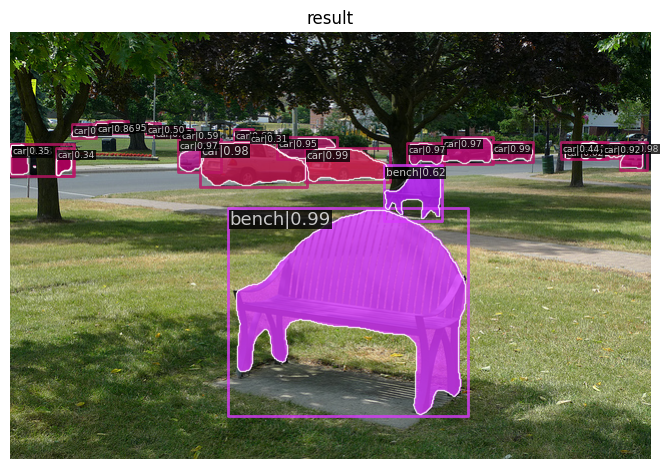

In [8]:
from mmdet.apis import show_result_pyplot

show_result_pyplot(model, img_path, results)

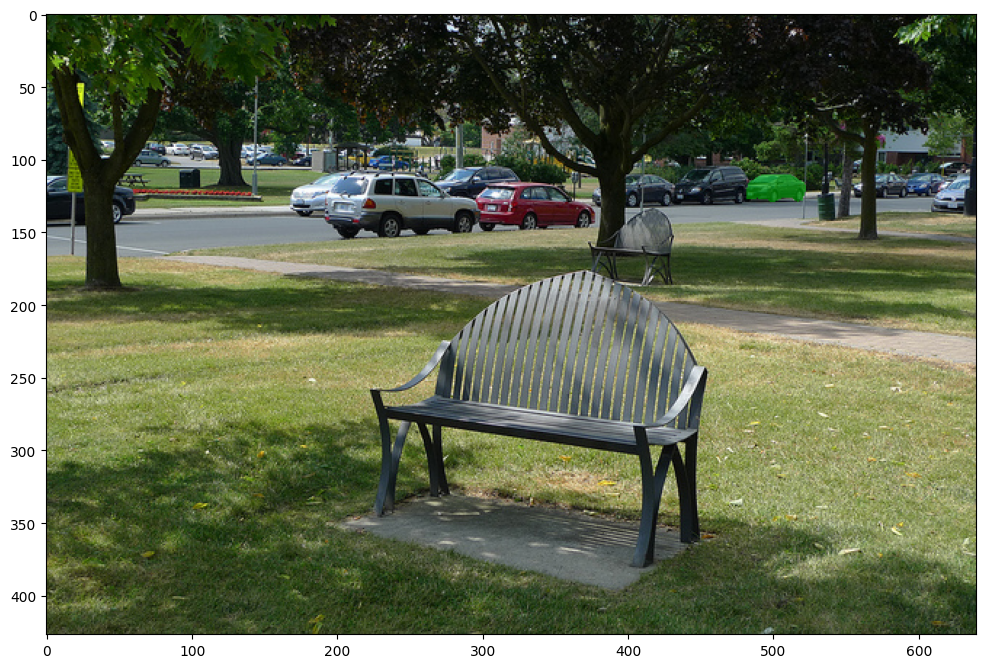

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_mask(image, mask, color, alpha=0.5):
  for c in range(3):
    image[:,:,c] = np.where(mask==1,
                            image[:,:,c] * (1-alpha) + alpha * color[c] * 255,
                            image[:,:,c])

  return image

img_arr = cv2.imread(img_path)
img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

draw_img = img_arr.copy()
masked_image = apply_mask(draw_img, results[1][2][0], (0,255,0), alpha=0.6)
plt.figure(figsize=(12,12))
plt.imshow(masked_image)

In [50]:
!mkdir /content/data

In [51]:
!wget -O /content/data/John_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2024-05-11 17:10:06--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2024-05-11 17:10:06--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2024-05-11 17:10:07--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.

In [54]:
import cv2

video_reader = mmcv.VideoReader('/content/data/John_Wick_small.mp4')
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('/content/data/John_Wick_small_out1.mp4', fourcc, video_reader.fps, (video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model, frame)
  frame = model.show_result(frame, result, score_thr=0.4)

  video_writer.write(frame)

if video_writer:
  video_writer.release()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 0.1 task/s, elapsed: 711s, ETA:     0s


In [55]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

colors = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250]] )

In [56]:
print(model.cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=None),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(type='L1Loss', loss_weight=1.0

In [74]:
def get_detected_img(model, img_array, score_threshold=0.3, is_print=True):
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color = (0,0,255)

  results = inference_detector(model, img_array)
  bbox_results = results[0]
  seg_results = results[1]

  for result_idx, bbox_result in enumerate(bbox_results):
    if len(bbox_result) == 0:
      continue

    mask_array_list = seg_results[result_idx]

    for i in range(len(bbox_result)):
      if bbox_result[i, 4] > score_threshold:
        left = int(bbox_result[i, 0])
        top = int(bbox_result[i, 1])
        right = int(bbox_result[i, 2])
        bottom = int(bbox_result[i, 3])
        caption = f'{labels_to_names_seq[result_idx]}: {bbox_result[i, 4]:.4f}'
        cv2.rectangle(draw_img, (left, top), (right, bottom), bbox_color, 2)
        cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 1)

        class_mask_array = mask_array_list[i]
        masked_roi = draw_img[class_mask_array]
        color_index = np.random.randint(0, len(colors)-1)
        color = colors[color_index]

        draw_img[class_mask_array] = ([0.3 * color[0], 0.3 * color[1], 0.3 * color[2]] + 0.6 * masked_roi).astype(np.uint8)
        if is_print:
          print(caption)
  return draw_img

In [59]:
img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
mask_array = results[1][2][0]

print(img_arr.shape)
print(mask_array.shape)
print(mask_array[mask_array].shape)
print(img_arr[results[1][2][0]].shape)

(427, 640, 3)
(427, 640)
(628,)
(628, 3)


car: 0.9910
car: 0.9892
car: 0.9833
car: 0.9832
car: 0.9801
car: 0.9715
car: 0.9654
car: 0.9650
car: 0.9546
car: 0.9531
car: 0.9524
car: 0.9464
car: 0.9209
car: 0.9160
car: 0.8646
car: 0.6161
car: 0.5985
car: 0.5947
car: 0.5020
car: 0.4424
car: 0.3456
car: 0.3411
car: 0.3080
bench: 0.9872
bench: 0.6239


array([[[ 9, 51, 16],
        [18, 57, 25],
        [20, 61, 29],
        ...,
        [11, 44, 17],
        [38, 67, 41],
        [40, 74, 50]],

       [[25, 61, 31],
        [22, 59, 25],
        [31, 69, 33],
        ...,
        [14, 48, 18],
        [17, 62, 35],
        [18, 67, 35]],

       [[13, 48, 28],
        [28, 63, 37],
        [27, 64, 30],
        ...,
        [17, 92, 54],
        [11, 64, 44],
        [26, 62, 26]],

       ...,

       [[45, 68, 63],
        [27, 66, 58],
        [49, 84, 74],
        ...,
        [18, 47, 31],
        [42, 79, 63],
        [33, 69, 47]],

       [[40, 66, 60],
        [18, 55, 45],
        [61, 92, 83],
        ...,
        [20, 52, 35],
        [57, 94, 78],
        [32, 68, 46]],

       [[42, 70, 64],
        [60, 95, 85],
        [48, 75, 66],
        ...,
        [29, 61, 44],
        [30, 69, 54],
        [22, 57, 37]]], dtype=uint8)
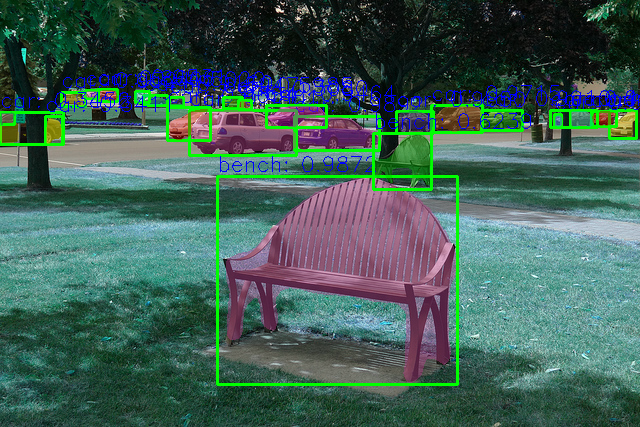

In [75]:
get_detected_img(model, img_arr, score_threshold=0.3, is_print=True)

In [76]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):

    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)
    btime = time.time()
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        stime = time.time()
        img_frame = get_detected_img(model, img_frame,  score_threshold=score_threshold,is_print=False)
        if do_print:
          print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))

In [77]:
do_detected_video(model, '/content/data/John_Wick_small.mp4', '/content/data/John_Wick_small_out2.mp4', score_threshold=0.4, do_print=True)

총 Frame 갯수: 58
frame별 detection 수행 시간: 11.3603
frame별 detection 수행 시간: 10.8177
frame별 detection 수행 시간: 11.5869
frame별 detection 수행 시간: 11.9471
frame별 detection 수행 시간: 11.7936
frame별 detection 수행 시간: 10.6937
frame별 detection 수행 시간: 11.3636
frame별 detection 수행 시간: 11.8798
frame별 detection 수행 시간: 11.8991
frame별 detection 수행 시간: 12.0256
frame별 detection 수행 시간: 10.309
frame별 detection 수행 시간: 11.4458
frame별 detection 수행 시간: 11.6511
frame별 detection 수행 시간: 11.6727
frame별 detection 수행 시간: 11.348
frame별 detection 수행 시간: 10.5107
frame별 detection 수행 시간: 12.9661
frame별 detection 수행 시간: 11.8263
frame별 detection 수행 시간: 11.7826
frame별 detection 수행 시간: 11.7216
frame별 detection 수행 시간: 10.3339
frame별 detection 수행 시간: 11.5329
frame별 detection 수행 시간: 12.0149
frame별 detection 수행 시간: 11.7987
frame별 detection 수행 시간: 11.3998
frame별 detection 수행 시간: 10.6585
frame별 detection 수행 시간: 11.672
frame별 detection 수행 시간: 11.8189
frame별 detection 수행 시간: 11.5496
frame별 detection 수행 시간: 11.0755
frame별 detection 수행 시간: 10.6